In [1]:
import pandas as pd
df = pd.read_csv('customer_shopping_behavior.csv')

In [2]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.describe(include = 'all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [4]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [5]:
df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median())) 

In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
#data cleaning using snake_casing 
#1.changing all column names into lowercase
#2.replacing space with undescore
#3.renaming purchase_amount_(usd) to purchase_amount for simplicity

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'}) 

In [9]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [10]:
# Creating a column age_group 4 equal labels 
labels = ['young_adult','adult','middle_aged','senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)

In [11]:
df[['age','age_group']].head(10)

,age,age_group
0,55,middle_aged
1,19,young_adult
2,50,middle_aged
3,21,young_adult
4,45,middle_aged
5,46,middle_aged
6,63,senior
7,27,young_adult
8,26,young_adult
9,57,middle_aged


In [12]:
# creating a column purchase_frequency_days
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly' : 7,
    'Annually' : 365,
    'Quarterly' : 90,
    'Bi-Weekly' : 14,
    'Monthly' : 30,
    'Every 3 Months' : 90
}
df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [13]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [14]:
df[['discount_applied', 'promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [15]:
(df['discount_applied'] == df['promo_code_used']).all()

np.True_

In [16]:
df = df.drop('promo_code_used', axis=1)

In [17]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [18]:
!pip install mysql-connector-python SQLAlchemy pandas

In [19]:
from sqlalchemy import create_engine

#MYSQL connection
username = "root"
password = "Mysql123."
host = "localhost"
port = "3306"
database = "customer_behaviour"

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")
# write DF to Mysql
table_name = "customer"
df.to_sql(table_name, engine, if_exists="replace", index = False)
# Sample query
df = pd.read_sql("SELECT * FROM customer LIMIT 5;", engine)
print(df.head())

   customer_id  age gender item_purchased  category  purchase_amount  \
0            1   55   Male         Blouse  Clothing               53   
1            2   19   Male        Sweater  Clothing               64   
2            3   50   Male          Jeans  Clothing               73   
3            4   21   Male        Sandals  Footwear               90   
4            5   45   Male         Blouse  Clothing               49   

        location size      color  season  review_rating subscription_status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   shipping_type discount_applied  previous_purchases payment_method  \
0        Express    

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

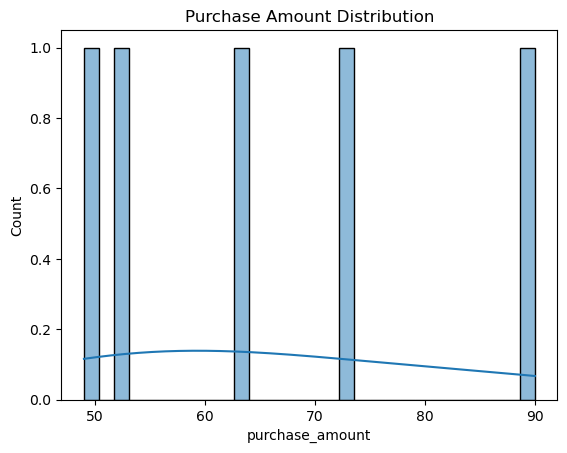

In [21]:
sns.histplot(df['purchase_amount'], bins=30, kde=True)
plt.title('Purchase Amount Distribution')
plt.show()

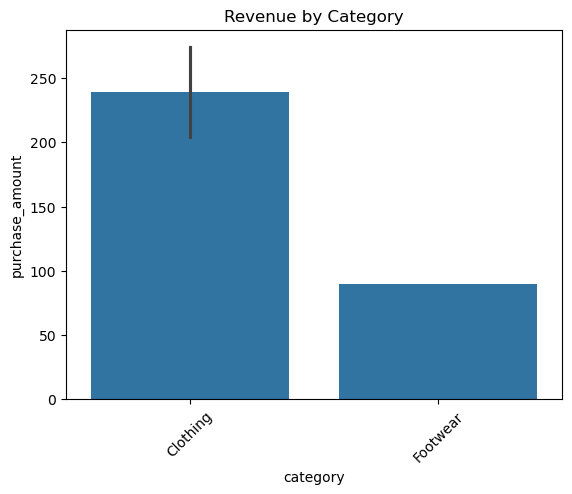

In [22]:
sns.barplot(x='category', y='purchase_amount', data=df, estimator='sum')
plt.title('Revenue by Category')
plt.xticks(rotation=45)
plt.show()

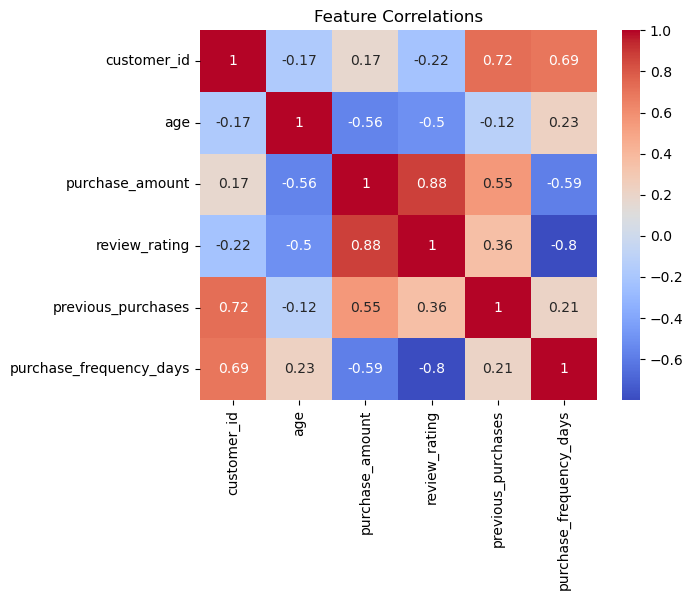

In [29]:
#Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


C:\Users\arunk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


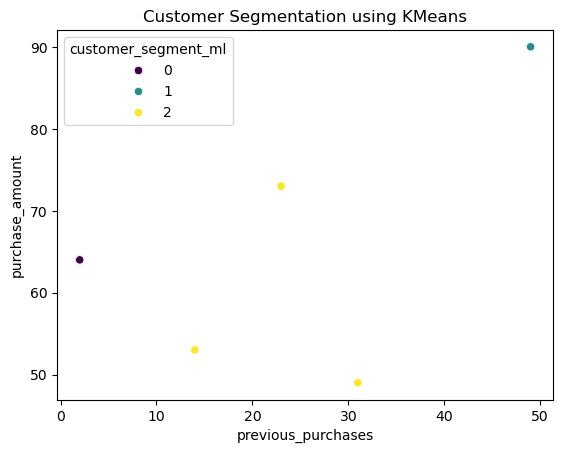

In [31]:
#ML-Based Customer Segmentation
from sklearn.cluster import KMeans
X = df[['purchase_amount', 'previous_purchases']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['customer_segment_ml'] = kmeans.fit_predict(X)
sns.scatterplot(x='previous_purchases', y='purchase_amount',
                hue='customer_segment_ml', palette='viridis', data=df)
plt.title('Customer Segmentation using KMeans')
plt.show()
